In [1]:
# =============================================================================
# SHARED PARAMETERS - Dynamic configuration from generator or manual setup
# =============================================================================

# 🤖 GENERATOR INTEGRATION: These parameters adapt automatically when generated
# 📝 MANUAL SETUP: Edit these values when running template directly

# Check if running in generator mode (variables injected in cell 2)
try:
    # Generator mode - use injected configuration
    FRAMEWORK_CONFIG_DICT = FRAMEWORK_CONFIG
    EXPERIMENT_RESULTS_DICT = EXPERIMENT_RESULTS
    
    # Extract dynamic parameters from generator
    EXPERIMENT_ID = EXPERIMENT_RESULTS_DICT.get('job_id', 'manual_analysis')
    FRAMEWORK_NAME = FRAMEWORK_CONFIG_DICT['framework_metadata']['name']
    TOTAL_SPEECHES = EXPERIMENT_RESULTS_DICT.get('total_speeches', 127)
    STAGE5_CORRELATION = EXPERIMENT_RESULTS_DICT.get('validation_correlation', 0.89)
    
    print("🤖 Generator mode detected - using injected configuration")
    print(f"   Framework: {FRAMEWORK_NAME}")
    print(f"   Experiment: {EXPERIMENT_ID}")
    
except NameError:
    # Manual mode - use hardcoded defaults for development/testing
    FRAMEWORK_CONFIG_DICT = None
    EXPERIMENT_RESULTS_DICT = None
    
    # Manual configuration (for development/testing)
    FRAMEWORK_PATH = '1_docs/frameworks/3_2_spec_frameworks/populism_pluralism/democratic_tension_axis_model_brazil_2018.yaml'
    RESULTS_DATA_PATH = '../../results/bolsonaro_democratic_tension_analysis.csv'
    EXPERIMENT_ID = 'demo_democratic_tension_2018_bolsonaro'
    FRAMEWORK_NAME = 'Democratic Tension Axis Model – Brazil 2018'
    TOTAL_SPEECHES = 127
    STAGE5_CORRELATION = 0.89
    
    print("📝 Manual mode - using hardcoded parameters for development")
    print(f"   Framework: {FRAMEWORK_NAME}")
    print(f"   Experiment: {EXPERIMENT_ID}")

# Common parameters for both modes
CORPUS_NAME = 'Bolsonaro 2018 Campaign Speeches'
TEMPORAL_PHASES = 3
SIGNIFICANCE_LEVEL = 'p < 0.001'

# =============================================================================
# VISUALIZATION PARAMETERS - Consistent styling across all visualizations
# =============================================================================

# Figure dimensions and quality (Nature journal compliance)
# Single-column: 3.5" wide (9 cm), Double-column: 7.2" wide (18 cm)
FIGURE_SIZE_SINGLE = (3.5, 4)         # Nature single-column standard
FIGURE_SIZE_DOUBLE = (7.2, 5)         # Nature double-column standard  
FIGURE_SIZE_SQUARE = (7.2, 7.2)       # Square for coordinate plots
FIGURE_SIZE_COMPLEX = (7.2, 8)        # Multi-panel within journal limits
DPI_NOTEBOOK = 200                     # Notebook display (increased for crisp viewing)
DPI_EXPORT = 600                       # Publication standard (was 300)
EXPORT_FORMATS = ['pdf', 'png', 'eps'] # PDF/EPS vector + high-res PNG

# =============================================================================
# DISCERNUS DESIGN GUIDE COMPLIANT STYLING
# Following 1_docs/visualization/design_guide.md standards
# =============================================================================

# Paul Tol's "Bright" Palette - Colorblind safe and grayscale compatible
TOL_BRIGHT_PALETTE = {
    'blue': '#4477AA',      # Dark gray (30%) in grayscale
    'green': '#228833',     # Medium gray (50%) in grayscale  
    'yellow': '#CCBB44',    # Light gray (75%) in grayscale
    'red': '#EE6677',       # Medium gray (60%) in grayscale
    'gray': '#BBBBBB'       # Light gray (73%) in grayscale
}

# Framework-specific color mapping using Paul Tol palette
ANCHOR_COLORS = {
    'populism': TOL_BRIGHT_PALETTE['red'],      # Red - strong populist appeal
    'pluralism': TOL_BRIGHT_PALETTE['blue'],    # Blue - institutional calm
    'nationalism': TOL_BRIGHT_PALETTE['yellow'], # Yellow - traditional emphasis
    'patriotism': TOL_BRIGHT_PALETTE['green']   # Green - constitutional stability
}

# Framework-specific color mapping (adapts to generator or uses defaults)
if FRAMEWORK_CONFIG_DICT:
    # Generator mode - extract colors from framework YAML
    framework_anchors = FRAMEWORK_CONFIG_DICT.get('anchors', {})
    ANCHOR_COLORS = {
        name: config.get('color', TOL_BRIGHT_PALETTE['blue'])
        for name, config in framework_anchors.items()
    }
    print(f"🎨 Using framework colors for {len(ANCHOR_COLORS)} anchors")
else:
    # Manual mode - use framework-specific colors matching the YAML
    ANCHOR_COLORS = {
        'populism': '#E53E3E',      # Red - matches framework YAML
        'pluralism': '#3182CE',     # Blue - matches framework YAML
        'nationalism': '#D69E2E',   # Gold - matches framework YAML
        'patriotism': '#38A169'     # Green - matches framework YAML
    }
    print("🎨 Using manual framework colors (matching YAML)")

# Temporal phase colors using remaining palette colors
PHASE_COLORS = {
    'early_campaign': TOL_BRIGHT_PALETTE['blue'],    # Blue progression
    'mid_campaign': TOL_BRIGHT_PALETTE['gray'],      # Gray transition
    'final_push': TOL_BRIGHT_PALETTE['red']          # Red intensity
}

# =============================================================================
# GRAYSCALE COMPATIBILITY SYSTEM
# Following design_guide.md grayscale strategy
# =============================================================================

# Marker shapes for grayscale distinction (from existing grayscale_strategy.py)
PHASE_MARKERS = {
    'early_campaign': 'o',     # Circle
    'mid_campaign': 's',       # Square  
    'final_push': '^'          # Triangle
}

# Line styles for trajectory segments
PHASE_LINE_STYLES = {
    'early_campaign': '-',     # Solid
    'mid_campaign': '--',      # Dashed
    'final_push': '-.'         # Dash-dot
}

# Hatching patterns for filled areas (grayscale compatibility)
PHASE_PATTERNS = {
    'early_campaign': '',      # Solid (no pattern)
    'mid_campaign': '///',     # Diagonal hatching
    'final_push': '|||'        # Vertical hatching
}

# Grayscale compatibility: Marker shapes and patterns for accessibility
PHASE_MARKERS = {
    'early_campaign': 'o',      # Circle - early stage
    'mid_campaign': 's',        # Square - structured middle
    'final_push': '^'           # Triangle - pointed final push
}

PHASE_LINE_STYLES = {
    'early_campaign': '-',      # Solid line
    'mid_campaign': '--',       # Dashed line
    'final_push': '-.'          # Dash-dot line
}

# Hatching patterns for filled areas (grayscale compatibility)
PHASE_HATCHING = {
    'early_campaign': '',       # No pattern (solid)
    'mid_campaign': '///',      # Diagonal hatching
    'final_push': '...'         # Dot pattern
}

ACCENT_COLORS = {
    'centroid': '#000000',          # Black - maximum contrast
    'trajectory': '#000000',        # Black - movement path
    'grid': '#D3D3D3',             # Light gray - subtle reference
    'highlight': TOL_BRIGHT_PALETTE['yellow']  # Yellow - emphasis
}

# Discernus Typography System - Inter-first with academic fallback
DISCERNUS_FONTS = {
    'primary': ['Inter', 'Source Sans Pro', 'Arial', 'Helvetica', 'sans-serif'],
    'academic_fallback': ['Arial', 'Helvetica', 'sans-serif'],
    'monospace': ['JetBrains Mono', 'Source Code Pro', 'Consolas', 'Monaco', 'monospace']
}

# Typography configuration (Nature journal standards with Discernus identity)
FONT_CONFIG = {
    'family': 'sans-serif',
    'sans_serif': DISCERNUS_FONTS['primary'],  # Inter-first typography
    'title_size': 12,    # Nature: 7pt, Discernus: 12pt for identity
    'label_size': 10,    # Nature: 6pt, Discernus: 10pt for readability
    'tick_size': 9,      # Nature: 5pt, Discernus: 9pt for clarity
    'legend_size': 8,    # Balanced for both contexts
    'annotation_size': 9 # Clear annotation text
}

# Marker and line styling
MARKER_CONFIG = {
    'anchor_size': 150,
    'anchor_style': 's',           # Square markers for anchors
    'speech_size': 40,
    'speech_alpha': 0.7,
    'centroid_size': 250,
    'centroid_style': '*',         # Star for overall centroid
    'trajectory_width': 2,
    'grid_alpha': 0.3
}

# Positioning and spacing
LAYOUT_CONFIG = {
    'anchor_label_distance': 1.25,     # How far anchor labels are from center
    'axis_label_distance': 0.85,      # Distance for axis labels
    'circle_boundary': 1.0,           # Unit circle radius
    'plot_limits': 1.4,               # Plot axis limits
    'legend_alpha': 0.8,
    'bbox_padding': 0.3
}

# Export and academic settings
ACADEMIC_CONFIG = {
    'citation_style': 'nature',
    'figure_quality': 'publication',
    'statistical_precision': 4,       # Decimal places for stats
    'metadata_detail': 'comprehensive'
}

# Random seed for reproducible synthetic data generation
RANDOM_SEED = 42

print("✅ Shared parameters configured")
print(f"📊 Framework: {FRAMEWORK_PATH}")
print(f"📈 Expected speeches: {TOTAL_SPEECHES}")
print(f"🎯 Experiment: {EXPERIMENT_ID}")


✅ Shared parameters configured
📊 Framework: 1_docs/frameworks/3_2_spec_frameworks/populism_pluralism/democratic_tension_axis_model_brazil_2018.yaml
📈 Expected speeches: 127
🎯 Experiment: demo_democratic_tension_2018_bolsonaro


In [2]:
# Democratic Tension Axis Analysis: Stage 6 Results Interpretation
# Generated automatically from Stage 5 CLI analysis (run_experiment.py)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import json
import yaml
from pathlib import Path
from datetime import datetime
from adjustText import adjust_text

# =============================================================================
# DISCERNUS CENTRALIZED DESIGN SYSTEM 
# Uses the existing "CSS equivalent" from discernus.visualization
# =============================================================================

from discernus.visualization import setup_style

# Apply Discernus distinctive identity (the "CSS equivalent" approach)
setup_style('discernus')

print("🎨 Using Discernus centralized design system")
print("   📝 Typography: Inter-first with academic fallback")
print("   🎨 Palette: Paul Tol Bright (colorblind-safe)")
print("   📏 Sizes: Optimized for readability and identity")
print()
print("💡 To switch to journal compliance:")
print("   setup_style('nature')  # One line change!")
print("   # All existing code works unchanged")

# Experiment metadata (using shared parameters)
EXPERIMENT_META = {
    'job_id': EXPERIMENT_ID,
    'framework_name': 'Democratic Tension Axis Model – Brazil 2018',
    'experiment_date': datetime.now().strftime('%Y-%m-%d'),
    'stage5_validation': {'correlation_with_manual': STAGE5_CORRELATION, 'significance': SIGNIFICANCE_LEVEL},
    'corpus': CORPUS_NAME,
    'total_speeches': TOTAL_SPEECHES,
    'temporal_phases': TEMPORAL_PHASES
}

print(f"🎯 {EXPERIMENT_META['framework_name']} Analysis")
print(f"📊 Experiment ID: {EXPERIMENT_META['job_id']}")
print(f"📈 Stage 5 Validation: r={EXPERIMENT_META['stage5_validation']['correlation_with_manual']}")
print("="*60)

# Load Stage 5 results with realistic Democratic Tension data
def create_realistic_bolsonaro_data():
    """Create realistic Bolsonaro campaign data based on Democratic Tension Axis patterns"""
    np.random.seed(RANDOM_SEED)  # Use shared parameter for reproducibility
    
    # Realistic speech timeline over 2018 campaign
    dates = pd.date_range('2018-01-15', '2018-10-28', periods=TOTAL_SPEECHES)
    
    # Create realistic score patterns for orthogonal axes
    # Early campaign: Higher populism, moderate nationalism
    # Mid campaign: Strategic positioning 
    # Final push: High populism + high nationalism (the "Bolsonaro positioning")
    
    speeches = []
    for i, date in enumerate(dates):
        # Determine temporal phase
        if date < pd.Timestamp('2018-05-01'):
            phase = 'early_campaign'
            pop_base, plur_base = 1.4, 0.3  # High populism, low pluralism
            nat_base, pat_base = 0.8, 0.6   # Moderate nationalism, moderate patriotism
        elif date < pd.Timestamp('2018-08-01'):
            phase = 'mid_campaign'  
            pop_base, plur_base = 1.2, 0.5  # Still high populism, slightly more pluralism
            nat_base, pat_base = 1.1, 0.8   # Increased nationalism and patriotism
        else:
            phase = 'final_push'
            pop_base, plur_base = 1.6, 0.2  # Very high populism, very low pluralism
            nat_base, pat_base = 1.5, 0.4   # Very high nationalism, lower patriotism
        
        # Generate scores with realistic variation (0-2 scale for T&F compatibility)
        pop_score = np.clip(np.random.normal(pop_base, 0.3), 0.0, 2.0)
        plur_score = np.clip(np.random.normal(plur_base, 0.2), 0.0, 2.0)
        nat_score = np.clip(np.random.normal(nat_base, 0.3), 0.0, 2.0)
        pat_score = np.clip(np.random.normal(pat_base, 0.25), 0.0, 2.0)
        
        speeches.append({
            'speech_id': f'bolsonaro_speech_{i+1:03d}',
            'date': date,
            'populism_score': pop_score,
            'pluralism_score': plur_score,
            'nationalism_score': nat_score,
            'patriotism_score': pat_score,
            'temporal_phase': phase,
            'venue': np.random.choice(['rally', 'tv_interview', 'social_media', 'debate']),
            'confidence': np.random.uniform(0.85, 0.98)  # High confidence scores
        })
    
    return pd.DataFrame(speeches)

# Load or create results data
try:
    results_df = pd.read_csv(RESULTS_DATA_PATH)
    print(f"✅ Loaded {len(results_df)} analyzed speeches from Stage 5")
except FileNotFoundError:
    print("📝 Generating realistic Democratic Tension analysis data...")
    results_df = create_realistic_bolsonaro_data()
    print(f"✅ Generated {len(results_df)} speeches with orthogonal axis dynamics")

print(f"\n📊 Dataset Overview:")
print(f"   • Time period: {results_df['date'].min().date()} to {results_df['date'].max().date()}")
print(f"   • Temporal phases: {results_df['temporal_phase'].value_counts().to_dict()}")
print(f"   • Score ranges: Pop[{results_df['populism_score'].min():.2f}-{results_df['populism_score'].max():.2f}], "
      f"Plur[{results_df['pluralism_score'].min():.2f}-{results_df['pluralism_score'].max():.2f}], "
      f"Nat[{results_df['nationalism_score'].min():.2f}-{results_df['nationalism_score'].max():.2f}], "
      f"Pat[{results_df['patriotism_score'].min():.2f}-{results_df['patriotism_score'].max():.2f}]")

results_df.head()


🎯 Discernus Typography: DISCERNUS
📝 Distinctive Discernus identity style
🔤 Font: Inter
📏 Sizes: Title(12pt), Label(10pt), Tick(9pt)
🎨 Using Discernus centralized design system
   📝 Typography: Inter-first with academic fallback
   🎨 Palette: Paul Tol Bright (colorblind-safe)
   📏 Sizes: Optimized for readability and identity

💡 To switch to journal compliance:
   setup_style('nature')  # One line change!
   # All existing code works unchanged
🎯 Democratic Tension Axis Model – Brazil 2018 Analysis
📊 Experiment ID: demo_democratic_tension_2018_bolsonaro
📈 Stage 5 Validation: r=0.89
📝 Generating realistic Democratic Tension analysis data...
✅ Generated 127 speeches with orthogonal axis dynamics

📊 Dataset Overview:
   • Time period: 2018-01-15 to 2018-10-28
   • Temporal phases: {'early_campaign': 47, 'mid_campaign': 41, 'final_push': 39}
   • Score ranges: Pop[0.46-2.00], Plur[0.00-1.07], Nat[0.26-2.00], Pat[0.00-1.26]


,speech_id,date,populism_score,pluralism_score,nationalism_score,patriotism_score,temporal_phase,venue,confidence
0,bolsonaro_speech_001,2018-01-15 00:00:00.000000000,1.549014,0.272347,0.994307,0.980757,early_campaign,social_media,0.907958
1,bolsonaro_speech_002,2018-01-17 06:28:34.285714285,1.371614,0.114234,0.534431,0.496953,early_campaign,social_media,0.852676
2,bolsonaro_speech_003,2018-01-19 12:57:08.571428571,1.225737,0.194966,0.628586,0.368979,early_campaign,tv_interview,0.850919
3,bolsonaro_speech_004,2018-01-21 19:25:42.857142857,1.406667,0.214441,0.640455,0.570631,early_campaign,debate,0.897627
4,bolsonaro_speech_005,2018-01-24 01:54:17.142857142,1.839695,0.254845,0.820258,0.243813,early_campaign,debate,0.910679


In [3]:
# Democratic Tension Axis: DCS Coordinate Analysis
# Implementing the orthogonal axis framework resolving the "crowding out" problem

def load_democratic_tension_framework():
    """Load Democratic Tension Axis framework configuration"""
    try:
        # Try to load from the actual framework file using shared parameter
        framework_path = Path(FRAMEWORK_PATH)
        if framework_path.exists():
            with open(framework_path, 'r') as f:
                framework_data = yaml.safe_load(f)
            print(f"✅ Loaded framework from {framework_path}")
            return framework_data
    except Exception as e:
        print(f"⚠️ Could not load framework file: {e}")
    
    # Fallback: Create framework structure matching the actual YAML
    framework = {
        'name': 'Democratic Tension Axis Model – Brazil 2018',
        'version': 'v3.2',
        'theoretical_foundation': 'Orthogonal democratic tensions with Portuguese optimization',
        'components': {
            'populism': {
                'component_id': 'populism',
                'type': 'anchor',
                'angle': 90,  # 12 o'clock - top of circle
                'position': (0.0, 1.0),
                'color': '#E53E3E',  # Red
                'description': 'Direct popular sovereignty, anti-elite rhetoric, Manichaean worldview'
            },
            'pluralism': {
                'component_id': 'pluralism',
                'type': 'anchor', 
                'angle': 270,  # 6 o'clock - bottom of circle
                'position': (0.0, -1.0),
                'color': '#3182CE',  # Blue
                'description': 'Institutional mediation, diverse representation, expert knowledge valorization'
            },
            'nationalism': {
                'component_id': 'nationalism',
                'type': 'anchor',
                'angle': 0,  # 3 o'clock - right of circle
                'position': (1.0, 0.0),
                'color': '#D69E2E',  # Gold
                'description': 'Emphasis on ethnic/cultural identity, national supremacy claims'
            },
            'patriotism': {
                'component_id': 'patriotism',
                'type': 'anchor',
                'angle': 180,  # 9 o'clock - left of circle
                'position': (-1.0, 0.0),
                'color': '#38A169',  # Green
                'description': 'Civic attachment to political institutions and constitutional values'
            }
        },
        'axes': {
            'PopulismPluralism': {
                'component_id': 'populism_pluralism_axis',
                'anchor_ids': ['populism', 'pluralism'],
                'description': 'Vertical dimension of democratic legitimacy',
                'axis_type': 'bipolar'
            },
            'PatriotismNationalism': {
                'component_id': 'patriotism_nationalism_axis', 
                'anchor_ids': ['patriotism', 'nationalism'],
                'description': 'Horizontal dimension of national identity',
                'axis_type': 'bipolar'
            }
        }
    }
    print("📝 Using fallback framework structure")
    return framework

def calculate_orthogonal_signatures(scores_dict, framework):
    """Calculate signature coordinates in orthogonal two-axis system"""
    # Extract scores
    populism = scores_dict['populism_score']
    pluralism = scores_dict['pluralism_score'] 
    nationalism = scores_dict['nationalism_score']
    patriotism = scores_dict['patriotism_score']
    
    # Calculate orthogonal axis positions
    # Vertical axis: Populism (positive) vs Pluralism (negative)
    vertical_axis = (populism - pluralism) / 2.0  # Range: -1 to +1
    
    # Horizontal axis: Nationalism (positive) vs Patriotism (negative)  
    horizontal_axis = (nationalism - patriotism) / 2.0  # Range: -1 to +1
    
    # Keep coordinates within unit circle
    magnitude = np.sqrt(vertical_axis**2 + horizontal_axis**2)
    if magnitude > 1.0:
        vertical_axis = vertical_axis / magnitude
        horizontal_axis = horizontal_axis / magnitude
    
    return np.array([horizontal_axis, vertical_axis])

# Load framework and calculate signatures
framework = load_democratic_tension_framework()
print("🎯 Democratic Tension Axis Framework")
print(f"   Theoretical foundation: {framework.get('theoretical_foundation', 'Orthogonal democratic tensions')}")

print("\n📍 Framework Components:")
components = framework.get('components', {})
for name, config in components.items():
    x, y = config.get('position', (0, 0))
    print(f"   • {name.title()}: ({x:.3f}, {y:.3f}) - {config.get('description', '')[:60]}...")

print("\n📐 Orthogonal Axes:")
axes = framework.get('axes', {})
for axis_name, axis_config in axes.items():
    anchor_ids = axis_config.get('anchor_ids', [])
    print(f"   • {axis_name}: {' ↔ '.join(anchor_ids)} - {axis_config.get('description', '')}")

# Calculate signatures with orthogonal dynamics
signatures = {}

print(f"\n🔄 Calculating orthogonal signatures...")
for idx, row in results_df.iterrows():
    scores = {
        'populism_score': row['populism_score'],
        'pluralism_score': row['pluralism_score'],
        'nationalism_score': row['nationalism_score'],
        'patriotism_score': row['patriotism_score']
    }
    
    signature = calculate_orthogonal_signatures(scores, framework)
    signatures[row['speech_id']] = signature

print(f"✅ Calculated {len(signatures)} orthogonal signatures")

# Show coordinate examples
example_speeches = list(signatures.keys())[:3]
print(f"\n📊 Signature Examples:")
for speech_id in example_speeches:
    coords = signatures[speech_id]
    print(f"   • {speech_id}: ({coords[0]:.3f}, {coords[1]:.3f})")

# Display framework validation metrics
all_coords = np.array(list(signatures.values()))
centroid_distance = np.linalg.norm(np.mean(all_coords, axis=0))
axis_correlation = np.corrcoef(all_coords[:, 0], all_coords[:, 1])[0, 1]

print(f"\n📈 Framework Validation:")
print(f"   • Overall discourse intensity: {centroid_distance:.3f}")
print(f"   • Coordinate space utilization: {np.std(all_coords):.3f}")
print(f"   • Axis independence (correlation): {axis_correlation:.4f}")
if abs(axis_correlation) < 0.1:
    print(f"   ✅ Excellent orthogonal independence")
elif abs(axis_correlation) < 0.3:
    print(f"   ✅ Good orthogonal independence") 
else:
    print(f"   ⚠️ Moderate axis correlation detected")


📝 Using fallback framework structure
🎯 Democratic Tension Axis Framework
   Theoretical foundation: Orthogonal democratic tensions with Portuguese optimization

📍 Framework Components:
   • Populism: (0.000, 1.000) - Direct popular sovereignty, anti-elite rhetoric, Manichaean ...
   • Pluralism: (0.000, -1.000) - Institutional mediation, diverse representation, expert know...
   • Nationalism: (1.000, 0.000) - Emphasis on ethnic/cultural identity, national supremacy cla...
   • Patriotism: (-1.000, 0.000) - Civic attachment to political institutions and constitutiona...

📐 Orthogonal Axes:
   • PopulismPluralism: populism ↔ pluralism - Vertical dimension of democratic legitimacy
   • PatriotismNationalism: patriotism ↔ nationalism - Horizontal dimension of national identity

🔄 Calculating orthogonal signatures...
✅ Calculated 127 orthogonal signatures

📊 Signature Examples:
   • bolsonaro_speech_001: (0.007, 0.638)
   • bolsonaro_speech_002: (0.019, 0.629)
   • bolsonaro_speech_003: (0

In [4]:
# Strategic Temporal Evolution: Advanced Multi-Panel Analysis

def plot_comprehensive_temporal_evolution(framework, signatures, results_df):
    """Advanced temporal analysis with comprehensive multi-panel layout (Sarah's approach)"""
    
    fig = plt.figure(figsize=FIGURE_SIZE_COMPLEX)
    
    # Create complex grid layout (matching Sarah's 3x3 approach)
    gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[2, 1, 1])
    
    # Main plot: Trajectory in coordinate space with time evolution
    ax_main = fig.add_subplot(gs[0, :2])
    circle = patches.Circle((0, 0), LAYOUT_CONFIG['circle_boundary'], 
                           fill=False, color='black', linewidth=2, alpha=0.8)
    ax_main.add_patch(circle)
    
    # Draw orthogonal axes prominently using shared parameters
    ax_main.axhline(y=0, color=ACCENT_COLORS['grid'], linewidth=2, alpha=0.6, linestyle='-')
    ax_main.axvline(x=0, color=ACCENT_COLORS['grid'], linewidth=2, alpha=0.6, linestyle='-')
    
    # Plot framework anchors using shared color scheme
    components = framework.get('components', {})
    for name, config in components.items():
        x, y = config.get('position', (0, 0))
        color = ANCHOR_COLORS.get(name, config.get('color', '#cccccc'))
        ax_main.scatter(x, y, s=MARKER_CONFIG['anchor_size'], c=color, 
                       marker=MARKER_CONFIG['anchor_style'], edgecolors='black', 
                       linewidth=2, zorder=15, alpha=0.9)
        
        # Position labels using shared layout config
        label_x = x * LAYOUT_CONFIG['anchor_label_distance']
        label_y = y * LAYOUT_CONFIG['anchor_label_distance']
        ax_main.annotate(name.title(), (label_x, label_y), 
                        fontsize=FONT_CONFIG['annotation_size'], ha='center', va='center', weight='bold',
                        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.9))
    
    # Add axis labels using shared positioning
    axis_distance = LAYOUT_CONFIG['axis_label_distance']
    ax_main.text(axis_distance, 0.05, 'Nationalism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.8))
    ax_main.text(-axis_distance, 0.05, 'Patriotism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.8))
    ax_main.text(0.05, axis_distance, 'Populism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.8))
    ax_main.text(0.05, -axis_distance, 'Pluralism', fontsize=FONT_CONFIG['label_size'], 
                ha='center', va='center', weight='bold',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='lightsteelblue', alpha=0.8))
    
    # Calculate phase centroids and detailed temporal analysis
    phase_data = {}
    phase_centroids = {}
    
    for phase in ['early_campaign', 'mid_campaign', 'final_push']:
        phase_mask = results_df['temporal_phase'] == phase
        phase_df = results_df[phase_mask]
        
        if len(phase_df) > 0:
            # Get coordinates for this phase
            phase_coords = np.array([signatures[speech_id] for speech_id in phase_df['speech_id'].values 
                                   if speech_id in signatures])
            
            if len(phase_coords) > 0:
                centroid = np.mean(phase_coords, axis=0)
                phase_centroids[phase] = centroid
                
                # Store detailed phase data
                phase_data[phase] = {
                    'coordinates': phase_coords,
                    'centroid': centroid,
                    'speeches': len(phase_coords),
                    'scores': {
                        'populism': phase_df['populism_score'].mean(),
                        'pluralism': phase_df['pluralism_score'].mean(),
                        'nationalism': phase_df['nationalism_score'].mean(),
                        'patriotism': phase_df['patriotism_score'].mean()
                    }
                }
                
                # Plot individual speeches using shared color scheme
                color = PHASE_COLORS[phase]
                ax_main.scatter(phase_coords[:, 0], phase_coords[:, 1], 
                               s=MARKER_CONFIG['speech_size'], c=color, 
                               alpha=MARKER_CONFIG['speech_alpha'], 
                               edgecolors='white', linewidth=1, zorder=5)
                
                # Plot phase centroid
                size = MARKER_CONFIG['anchor_size'] + (len(phase_coords) * 2)
                ax_main.scatter(centroid[0], centroid[1], s=size, c=color, 
                               marker='D', edgecolors='black', linewidth=3, zorder=12)
                
                # Add phase labels
                label_text = f"{phase.replace('_', ' ').title()}\n({len(phase_coords)} speeches)"
                ax_main.annotate(label_text, (centroid[0], centroid[1]), 
                               xytext=(15, 15), textcoords='offset points', 
                               fontsize=FONT_CONFIG['annotation_size'], weight='bold', ha='center',
                               bbox=dict(boxstyle='round,pad=0.5', 
                                        facecolor=color, alpha=LAYOUT_CONFIG['legend_alpha']))
    
    # Draw trajectory with strategic arrows using shared styling
    if len(phase_centroids) >= 2:
        phases_order = ['early_campaign', 'mid_campaign', 'final_push']
        trajectory_points = [phase_centroids[p] for p in phases_order if p in phase_centroids]
        
        if len(trajectory_points) >= 2:
            trajectory_array = np.array(trajectory_points)
            
            # Draw trajectory line using shared colors
            ax_main.plot(trajectory_array[:, 0], trajectory_array[:, 1], 
                        color=ACCENT_COLORS['trajectory'], linewidth=MARKER_CONFIG['trajectory_width']*2, 
                        alpha=0.8, zorder=8, label='Campaign Trajectory')
            
            # Add strategic transition arrows
            for i in range(len(trajectory_array) - 1):
                start = trajectory_array[i]
                end = trajectory_array[i + 1]
                dx, dy = end - start
                
                # Calculate arrow properties
                arrow_length = np.sqrt(dx**2 + dy**2)
                if arrow_length > 0.05:  # Only draw significant movements
                    ax_main.annotate('', xy=end, xytext=start,
                                   arrowprops=dict(arrowstyle='->', lw=3, 
                                                 color='darkred', alpha=0.8))
                    
                    # Add transition labels
                    mid_point = (start + end) / 2
                    transition_labels = ['Early→Mid', 'Mid→Final']
                    if i < len(transition_labels):
                        ax_main.text(mid_point[0], mid_point[1], transition_labels[i],
                                   fontsize=FONT_CONFIG['tick_size'], ha='center', va='center', weight='bold',
                                   bbox=dict(boxstyle='round,pad=0.3', 
                                           facecolor=ACCENT_COLORS['highlight'], alpha=0.7))
    
    # Format main plot using shared parameters
    limits = LAYOUT_CONFIG['plot_limits']
    ax_main.set_xlim(-limits, limits)
    ax_main.set_ylim(-limits, limits)
    ax_main.set_aspect('equal')
    ax_main.set_title('Strategic Discourse Evolution', fontsize=FONT_CONFIG['title_size'], 
                     weight='bold', pad=20)
    ax_main.set_xlabel('Patriotism ← → Nationalism', fontsize=FONT_CONFIG['label_size'])
    ax_main.set_ylabel('Pluralism ← → Populism', fontsize=FONT_CONFIG['label_size'])
    ax_main.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Return figure and phase data for additional panels
    return fig, ax_main, phase_data, gs

def add_supporting_panels(fig, gs, phase_data):
    """Add supporting analysis panels to the main figure"""
    
    # Top right: Axis Independence Analysis
    ax_independence = fig.add_subplot(gs[0, 2])
    
    # Calculate axis independence for all speeches
    all_coords = []
    for data in phase_data.values():
        all_coords.extend(data['coordinates'])
    
    if len(all_coords) > 0:
        all_coords = np.array(all_coords)
        x_coords = all_coords[:, 0]  # Horizontal axis
        y_coords = all_coords[:, 1]  # Vertical axis
        
        # Scatter plot of axis coordinates
        ax_independence.scatter(x_coords, y_coords, alpha=0.6, s=MARKER_CONFIG['speech_size'], 
                              c='purple')
        
        # Add regression line to show independence
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, y_coords)
        line_x = np.linspace(ax_independence.get_xlim()[0], ax_independence.get_xlim()[1], 100)
        line_y = slope * line_x + intercept
        ax_independence.plot(line_x, line_y, 'r--', alpha=0.8, linewidth=2)
        
        ax_independence.set_xlabel('Horizontal Axis', fontsize=FONT_CONFIG['tick_size'])
        ax_independence.set_ylabel('Vertical Axis', fontsize=FONT_CONFIG['tick_size'])
        ax_independence.set_title('Axis Independence', fontsize=FONT_CONFIG['annotation_size'], 
                                weight='bold', pad=15)
        ax_independence.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
        
        # Add correlation statistics
        ax_independence.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}', 
                           transform=ax_independence.transAxes, fontsize=FONT_CONFIG['tick_size'], 
                           weight='bold', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
                           verticalalignment='top')
    
    # Bottom left: Score evolution timeline
    ax_scores = fig.add_subplot(gs[1, :2])
    
    phases = list(phase_data.keys())
    x_pos = np.arange(len(phases))
    width = 0.2
    
    # Extract scores for each phase
    scores_pop = [phase_data[p]['scores']['populism'] for p in phases]
    scores_plur = [phase_data[p]['scores']['pluralism'] for p in phases]
    scores_nat = [phase_data[p]['scores']['nationalism'] for p in phases]
    scores_pat = [phase_data[p]['scores']['patriotism'] for p in phases]
    
    # Plot bars using shared color scheme
    ax_scores.bar(x_pos - width*1.5, scores_pop, width, label='Populism', 
                 color=ANCHOR_COLORS['populism'], alpha=0.8)
    ax_scores.bar(x_pos - width*0.5, scores_plur, width, label='Pluralism', 
                 color=ANCHOR_COLORS['pluralism'], alpha=0.8)
    ax_scores.bar(x_pos + width*0.5, scores_nat, width, label='Nationalism', 
                 color=ANCHOR_COLORS['nationalism'], alpha=0.8)
    ax_scores.bar(x_pos + width*1.5, scores_pat, width, label='Patriotism', 
                 color=ANCHOR_COLORS['patriotism'], alpha=0.8)
    
    ax_scores.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax_scores.set_ylabel('Average Score', fontsize=FONT_CONFIG['label_size'])
    ax_scores.set_title('Ideological Emphasis Evolution', fontsize=FONT_CONFIG['annotation_size'], 
                       weight='bold')
    ax_scores.set_xticks(x_pos)
    ax_scores.set_xticklabels([p.replace('_', ' ').title() for p in phases])
    ax_scores.legend(loc='upper right', fontsize=FONT_CONFIG['legend_size'])
    ax_scores.grid(True, alpha=MARKER_CONFIG['grid_alpha'], axis='y')
    
    # Bottom right: Campaign statistics
    ax_stats = fig.add_subplot(gs[1, 2])
    ax_stats.axis('off')
    
    # Calculate trajectory statistics
    if len(phase_data) >= 2:
        phases_order = ['early_campaign', 'mid_campaign', 'final_push']
        centroids = [phase_data[p]['centroid'] for p in phases_order if p in phase_data]
        
        if len(centroids) >= 2:
            total_movement = sum(np.linalg.norm(centroids[i+1] - centroids[i])
                               for i in range(len(centroids)-1))
            
            # Create statistics text
            total_speeches = sum(phase_data[p]['speeches'] for p in phase_data)
            stats_text = f"""CAMPAIGN ANALYSIS

📊 Total Speeches: {total_speeches}
📈 Trajectory Distance: {total_movement:.3f}
⚔️ Phase Transitions: {len(centroids)-1}

🎯 PHASE BREAKDOWN:"""
            
            for phase in phases_order:
                if phase in phase_data:
                    count = phase_data[phase]['speeches']
                    phase_name = phase.replace('_', ' ').title()
                    stats_text += f"\n{phase_name}: {count} speeches"
            
            ax_stats.text(0.05, 0.95, stats_text, transform=ax_stats.transAxes,
                         fontsize=FONT_CONFIG['tick_size'], verticalalignment='top', 
                         fontfamily='monospace',
                         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    
    # Bottom center: Discourse space efficiency
    ax_efficiency = fig.add_subplot(gs[2, :])
    
    # Calculate phase dispersion (how spread out speeches are in each phase)
    phase_dispersions = []
    phase_names = []
    
    for phase, data in phase_data.items():
        coords = data['coordinates']
        centroid = data['centroid']
        
        # Calculate average distance from phase centroid
        distances = [np.linalg.norm(coord - centroid) for coord in coords]
        avg_dispersion = np.mean(distances) if distances else 0
        phase_dispersions.append(avg_dispersion)
        phase_names.append(phase.replace('_', ' ').title())
    
    # Plot dispersion timeline
    ax_efficiency.plot(range(len(phase_names)), phase_dispersions, 
                      'o-', linewidth=3, markersize=8, color='darkgreen')
    
    ax_efficiency.fill_between(range(len(phase_names)), phase_dispersions, alpha=0.3, color='lightgreen')
    ax_efficiency.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax_efficiency.set_ylabel('Discourse Dispersion', fontsize=FONT_CONFIG['label_size'])
    ax_efficiency.set_title('Campaign Message Consistency (Lower = More Focused)', 
                           fontsize=FONT_CONFIG['annotation_size'], weight='bold')
    ax_efficiency.set_xticks(range(len(phase_names)))
    ax_efficiency.set_xticklabels(phase_names)
    ax_efficiency.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Add annotations for key insights
    if phase_dispersions:
        min_idx = np.argmin(phase_dispersions)
        ax_efficiency.annotate(f'Most Focused\n({phase_dispersions[min_idx]:.3f})', 
                              xy=(min_idx, phase_dispersions[min_idx]),
                              xytext=(min_idx, phase_dispersions[min_idx] + 0.02),
                              ha='center', fontsize=FONT_CONFIG['tick_size'], weight='bold',
                              arrowprops=dict(arrowstyle='->', color='red'))
    
    plt.tight_layout()
    return fig
    
# ⚠️ OLD MEGA CHART AND EXPORT CODE REMOVED
# The mega chart and its export functions have been removed
# Now we focus on individual charts for iterative development

print("✅ Mega chart removed - using individual focused charts instead!")
print("🔽 See the individual charts below for clean, iterative visualization")
print()
print("📝 Note: Export and metadata functions can be added back later")
print("🎯 Focus now is on perfecting the individual chart visualizations")


✅ Mega chart removed - using individual focused charts instead!
🔽 See the individual charts below for clean, iterative visualization

📝 Note: Export and metadata functions can be added back later
🎯 Focus now is on perfecting the individual chart visualizations


In [5]:
# Individual Chart Functions - Focused Visualizations for Iterative Development

def calculate_phase_data(signatures, results_df):
    """Calculate phase data that will be shared across multiple chart functions"""
    phase_data = {}
    
    for phase in ['early_campaign', 'mid_campaign', 'final_push']:
        phase_mask = results_df['temporal_phase'] == phase
        phase_df = results_df[phase_mask]
        
        if len(phase_df) > 0:
            # Get coordinates for this phase
            phase_coords = np.array([signatures[speech_id] for speech_id in phase_df['speech_id'].values 
                                   if speech_id in signatures])
            
            if len(phase_coords) > 0:
                centroid = np.mean(phase_coords, axis=0)
                
                phase_data[phase] = {
                    'coordinates': phase_coords,
                    'centroid': centroid,
                    'speeches': len(phase_coords),
                    'scores': {
                        'populism': phase_df['populism_score'].mean(),
                        'pluralism': phase_df['pluralism_score'].mean(),
                        'nationalism': phase_df['nationalism_score'].mean(),
                        'patriotism': phase_df['patriotism_score'].mean()
                    }
                }
    
    return phase_data

def plot_discourse_coordinate_space(framework, signatures, phase_data, title="Discourse Coordinate Space"):
    """Clean, focused coordinate space visualization with trajectory"""
    
    fig, ax = plt.subplots(figsize=FIGURE_SIZE_SQUARE)  # 7.2x7.2 Nature standard
    
    # Unit circle boundary
    circle = patches.Circle((0, 0), LAYOUT_CONFIG['circle_boundary'], 
                           fill=False, color='black', linewidth=2, alpha=0.8)
    ax.add_patch(circle)
    
    # Removed orthogonal axis lines - let the data and anchors define the space
    
    # Plot framework anchors - background canvas elements
    components = framework.get('components', {})
    
    for name, config in components.items():
        x, y = config.get('position', (0, 0))
        # Uniform gray circles - anchors are framework structure, not data
        ax.scatter(x, y, s=MARKER_CONFIG['anchor_size'], c='#808080', 
                  marker='o', edgecolors='black', 
                  linewidth=1, zorder=5, alpha=0.7)  # Lower zorder, more subtle
        
        # Smart anchor label positioning - place outside the circle with proper offset
        # Calculate position outside the unit circle with consistent distance
        label_distance = 1.15  # Just outside the circle
        label_x = x * label_distance
        label_y = y * label_distance
        
        # Adjust text alignment based on position to avoid edge clipping
        if x > 0.1:  # Right side
            ha = 'left'
        elif x < -0.1:  # Left side  
            ha = 'right'
        else:  # Center
            ha = 'center'
            
        if y > 0.1:  # Top
            va = 'bottom'
        elif y < -0.1:  # Bottom
            va = 'top'
        else:  # Middle
            va = 'center'
        
        ax.text(label_x, label_y, name.title(), 
               fontsize=FONT_CONFIG['annotation_size'], ha=ha, va=va, weight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.9, edgecolor='none'))
    
    # Plot phase data with grayscale compatibility
    for phase, data in phase_data.items():
        color = PHASE_COLORS[phase]
        marker = PHASE_MARKERS[phase]  # Distinct marker for grayscale
        coords = data['coordinates']
        centroid = data['centroid']
        
        # Individual speeches with distinct markers for grayscale compatibility
        ax.scatter(coords[:, 0], coords[:, 1], 
                  s=MARKER_CONFIG['speech_size'], c=color, 
                  marker=marker,  # Distinct marker shape
                  alpha=MARKER_CONFIG['speech_alpha'], 
                  edgecolors='black', linewidth=1.5, zorder=5,  # Black edges for contrast
                  label=f"{phase.replace('_', ' ').title()} ({len(coords)} speeches)")
        
        # Phase centroid with distinct marker
        ax.scatter(centroid[0], centroid[1], s=MARKER_CONFIG['anchor_size']*1.5, 
                  c=color, marker='D', edgecolors='black', linewidth=3, zorder=12)
    
    # Draw trajectory with grayscale-compatible line styles
    phases_order = ['early_campaign', 'mid_campaign', 'final_push']
    centroids = [phase_data[p]['centroid'] for p in phases_order if p in phase_data]
    
    if len(centroids) >= 2:
        trajectory_array = np.array(centroids)
        
        # Draw trajectory segments with different line styles for grayscale compatibility
        for i in range(len(trajectory_array) - 1):
            start_phase = phases_order[i]
            line_style = PHASE_LINE_STYLES[start_phase]
            
            # Draw segment with distinct line style
            ax.plot(trajectory_array[i:i+2, 0], trajectory_array[i:i+2, 1], 
                   color=ACCENT_COLORS['trajectory'], 
                   linewidth=MARKER_CONFIG['trajectory_width']*2,
                   linestyle=line_style,  # Distinct line style for grayscale
                   alpha=0.9, zorder=8)
        
        # Add arrows with enhanced visibility
        for i in range(len(trajectory_array) - 1):
            start = trajectory_array[i]
            end = trajectory_array[i + 1]
            dx, dy = end - start
            
            if np.sqrt(dx**2 + dy**2) > 0.05:
                ax.annotate('', xy=end, xytext=start,
                           arrowprops=dict(arrowstyle='->', lw=4, color='black', alpha=0.9))
        
        # Add trajectory label
        ax.plot([], [], color='black', linewidth=3, label='Campaign Trajectory')
    
    # Format plot - framework-agnostic approach
    limits = LAYOUT_CONFIG['plot_limits']
    ax.set_xlim(-limits, limits)
    ax.set_ylim(-limits, limits)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=FONT_CONFIG['title_size'], weight='bold', pad=20)
    # Removed X/Y axis labels - anchor labels provide all semantic meaning
    # Removed grid lines - focus on data patterns, not coordinate infrastructure
    # Remove axis ticks and labels for clean coordinate space
    ax.set_xticks([])
    ax.set_yticks([])
    # Remove the L-shaped axis frame for pure coordinate space
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(loc='upper left', fontsize=FONT_CONFIG['legend_size'], frameon=False)
    
    plt.tight_layout()
    return fig, ax

def plot_axis_independence(signatures, title="Axis Independence Analysis"):
    """Focused axis independence validation chart"""
    
    fig, ax = plt.subplots(figsize=FIGURE_SIZE_DOUBLE)  # 7.2x5 Nature double-column
    
    # Get all coordinates
    all_coords = np.array(list(signatures.values()))
    x_coords = all_coords[:, 0]  # Horizontal axis
    y_coords = all_coords[:, 1]  # Vertical axis
    
    # Scatter plot
    ax.scatter(x_coords, y_coords, alpha=0.6, s=MARKER_CONFIG['speech_size'], c='purple')
    
    # Regression line
    from scipy import stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, y_coords)
    line_x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    line_y = slope * line_x + intercept
    ax.plot(line_x, line_y, 'r--', alpha=0.8, linewidth=2)
    
    # Labels and formatting - framework-agnostic approach
    # Removed X/Y axis labels - focus on coordinate relationships, not framework-specific meanings
    ax.set_title(title, fontsize=FONT_CONFIG['title_size'], weight='bold')
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Statistics
    ax.text(0.05, 0.95, f'r = {r_value:.4f}\np = {p_value:.4f}', 
           transform=ax.transAxes, fontsize=FONT_CONFIG['annotation_size'], weight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
           verticalalignment='top')
    
    # Independence status
    if abs(r_value) < 0.1:
        status = "Excellent Independence"
        color = 'green'
    elif abs(r_value) < 0.3:
        status = "Good Independence"
        color = 'orange'
    else:
        status = "Moderate Correlation"
        color = 'red'
    
    ax.text(0.05, 0.75, status, transform=ax.transAxes, 
           fontsize=FONT_CONFIG['annotation_size'], weight='bold', color=color,
           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    plt.tight_layout()
    return fig, ax

def plot_score_evolution(phase_data, title="Ideological Score Evolution"):
    """Focused score evolution bar chart"""
    
    fig, ax = plt.subplots(figsize=FIGURE_SIZE_DOUBLE)  # 7.2x5 Nature double-column
    
    phases = list(phase_data.keys())
    x_pos = np.arange(len(phases))
    width = 0.2
    
    # Extract scores
    scores_pop = [phase_data[p]['scores']['populism'] for p in phases]
    scores_plur = [phase_data[p]['scores']['pluralism'] for p in phases]
    scores_nat = [phase_data[p]['scores']['nationalism'] for p in phases]
    scores_pat = [phase_data[p]['scores']['patriotism'] for p in phases]
    
    # Plot bars with hatching patterns for grayscale compatibility
    patterns = ['', '///', '|||', '...']  # Distinct patterns for each anchor
    
    ax.bar(x_pos - width*1.5, scores_pop, width, label='Populism', 
           color=ANCHOR_COLORS['populism'], alpha=0.8,
           hatch=patterns[0], edgecolor='black', linewidth=1.2)
    ax.bar(x_pos - width*0.5, scores_plur, width, label='Pluralism', 
           color=ANCHOR_COLORS['pluralism'], alpha=0.8,
           hatch=patterns[1], edgecolor='black', linewidth=1.2)
    ax.bar(x_pos + width*0.5, scores_nat, width, label='Nationalism', 
           color=ANCHOR_COLORS['nationalism'], alpha=0.8,
           hatch=patterns[2], edgecolor='black', linewidth=1.2)
    ax.bar(x_pos + width*1.5, scores_pat, width, label='Patriotism', 
           color=ANCHOR_COLORS['patriotism'], alpha=0.8,
           hatch=patterns[3], edgecolor='black', linewidth=1.2)
    
    # Formatting
    ax.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax.set_ylabel('Average Score', fontsize=FONT_CONFIG['label_size'])
    ax.set_title(title, fontsize=FONT_CONFIG['title_size'], weight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([p.replace('_', ' ').title() for p in phases])
    ax.legend(loc='upper right', fontsize=FONT_CONFIG['legend_size'])
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'], axis='y')
    
    plt.tight_layout()
    return fig, ax

def plot_discourse_consistency(phase_data, title="Campaign Message Consistency"):
    """Focused discourse consistency/dispersion chart"""
    
    fig, ax = plt.subplots(figsize=FIGURE_SIZE_DOUBLE)  # 7.2x5 Nature double-column
    
    # Calculate dispersions
    phase_dispersions = []
    phase_names = []
    
    for phase, data in phase_data.items():
        coords = data['coordinates']
        centroid = data['centroid']
        
        distances = [np.linalg.norm(coord - centroid) for coord in coords]
        avg_dispersion = np.mean(distances) if distances else 0
        phase_dispersions.append(avg_dispersion)
        phase_names.append(phase.replace('_', ' ').title())
    
    # Plot
    ax.plot(range(len(phase_names)), phase_dispersions, 
           'o-', linewidth=3, markersize=8, color='darkgreen')
    ax.fill_between(range(len(phase_names)), phase_dispersions, alpha=0.3, color='lightgreen')
    
    # Formatting
    ax.set_xlabel('Campaign Phase', fontsize=FONT_CONFIG['label_size'])
    ax.set_ylabel('Discourse Dispersion', fontsize=FONT_CONFIG['label_size'])
    ax.set_title(title + ' (Lower = More Focused)', fontsize=FONT_CONFIG['title_size'], weight='bold')
    ax.set_xticks(range(len(phase_names)))
    ax.set_xticklabels(phase_names)
    ax.grid(True, alpha=MARKER_CONFIG['grid_alpha'])
    
    # Annotation
    if phase_dispersions:
        min_idx = np.argmin(phase_dispersions)
        ax.annotate(f'Most Focused\n({phase_dispersions[min_idx]:.3f})', 
                   xy=(min_idx, phase_dispersions[min_idx]),
                   xytext=(min_idx, phase_dispersions[min_idx] + 0.02),
                   ha='center', fontsize=FONT_CONFIG['annotation_size'], weight='bold',
                   arrowprops=dict(arrowstyle='->', color='red'))
    
    plt.tight_layout()
    return fig, ax

def export_figure_discernus_standard(fig, filename_base, output_dir='outputs/'):
    """
    Export figure following Discernus Design Guide standards
    
    Args:
        fig: matplotlib figure object
        filename_base: base filename without extension
        output_dir: output directory path
    """
    from pathlib import Path
    
    # Ensure output directory exists
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Export in all required formats
    exports_completed = []
    
    for fmt in EXPORT_FORMATS:
        filepath = Path(output_dir) / f"{filename_base}.{fmt}"
        
        if fmt == 'png':
            fig.savefig(filepath, dpi=DPI_EXPORT, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
        else:  # pdf, eps
            fig.savefig(filepath, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
        
        exports_completed.append(str(filepath))
    
    print(f"📁 Exported {filename_base}:")
    for path in exports_completed:
        print(f"   • {path}")
    
    return exports_completed

def print_campaign_statistics(phase_data):
    """Print campaign statistics summary"""
    
    phases_order = ['early_campaign', 'mid_campaign', 'final_push']
    centroids = [phase_data[p]['centroid'] for p in phases_order if p in phase_data]
    
    total_movement = 0
    if len(centroids) >= 2:
        total_movement = sum(np.linalg.norm(centroids[i+1] - centroids[i])
                           for i in range(len(centroids)-1))
    
    total_speeches = sum(phase_data[p]['speeches'] for p in phase_data)
    
    print("📊 CAMPAIGN ANALYSIS SUMMARY")
    print("=" * 40)
    print(f"📈 Total Speeches: {total_speeches}")
    print(f"📍 Trajectory Distance: {total_movement:.3f}")
    print(f"⚔️ Phase Transitions: {len(centroids)-1}")
    print()
    print("🎯 PHASE BREAKDOWN:")
    for phase in phases_order:
        if phase in phase_data:
            count = phase_data[phase]['speeches']
            phase_name = phase.replace('_', ' ').title()
            intensity = np.linalg.norm(phase_data[phase]['centroid'])
            print(f"   • {phase_name}: {count} speeches (intensity: {intensity:.3f})")

print("✅ Individual chart functions created!")
print("🎯 Ready to test each visualization separately")
print("📁 Export function available: export_figure_discernus_standard()")


✅ Individual chart functions created!
🎯 Ready to test each visualization separately
📁 Export function available: export_figure_discernus_standard()


In [6]:
# Test Individual Charts - One at a Time for Iterative Development

# First, calculate the shared phase data
print("🔄 Calculating phase data...")
phase_data = calculate_phase_data(signatures, results_df)
print(f"✅ Calculated data for {len(phase_data)} phases")
print()

# Print basic statistics first
print_campaign_statistics(phase_data)
print("\n" + "="*60)
print("📊 Now let's look at each visualization individually...")
print("="*60)


🔄 Calculating phase data...
✅ Calculated data for 3 phases

📊 CAMPAIGN ANALYSIS SUMMARY
📈 Total Speeches: 127
📍 Trajectory Distance: 0.710
⚔️ Phase Transitions: 2

🎯 PHASE BREAKDOWN:
   • Early Campaign: 47 speeches (intensity: 0.545)
   • Mid Campaign: 41 speeches (intensity: 0.375)
   • Final Push: 39 speeches (intensity: 0.867)

📊 Now let's look at each visualization individually...


🎯 Chart 1: Main Discourse Coordinate Space with Trajectory
   ▸ Shows: Framework anchors, speech positions, phase centroids, trajectory
   ▸ Focus: Core spatial analysis and temporal evolution



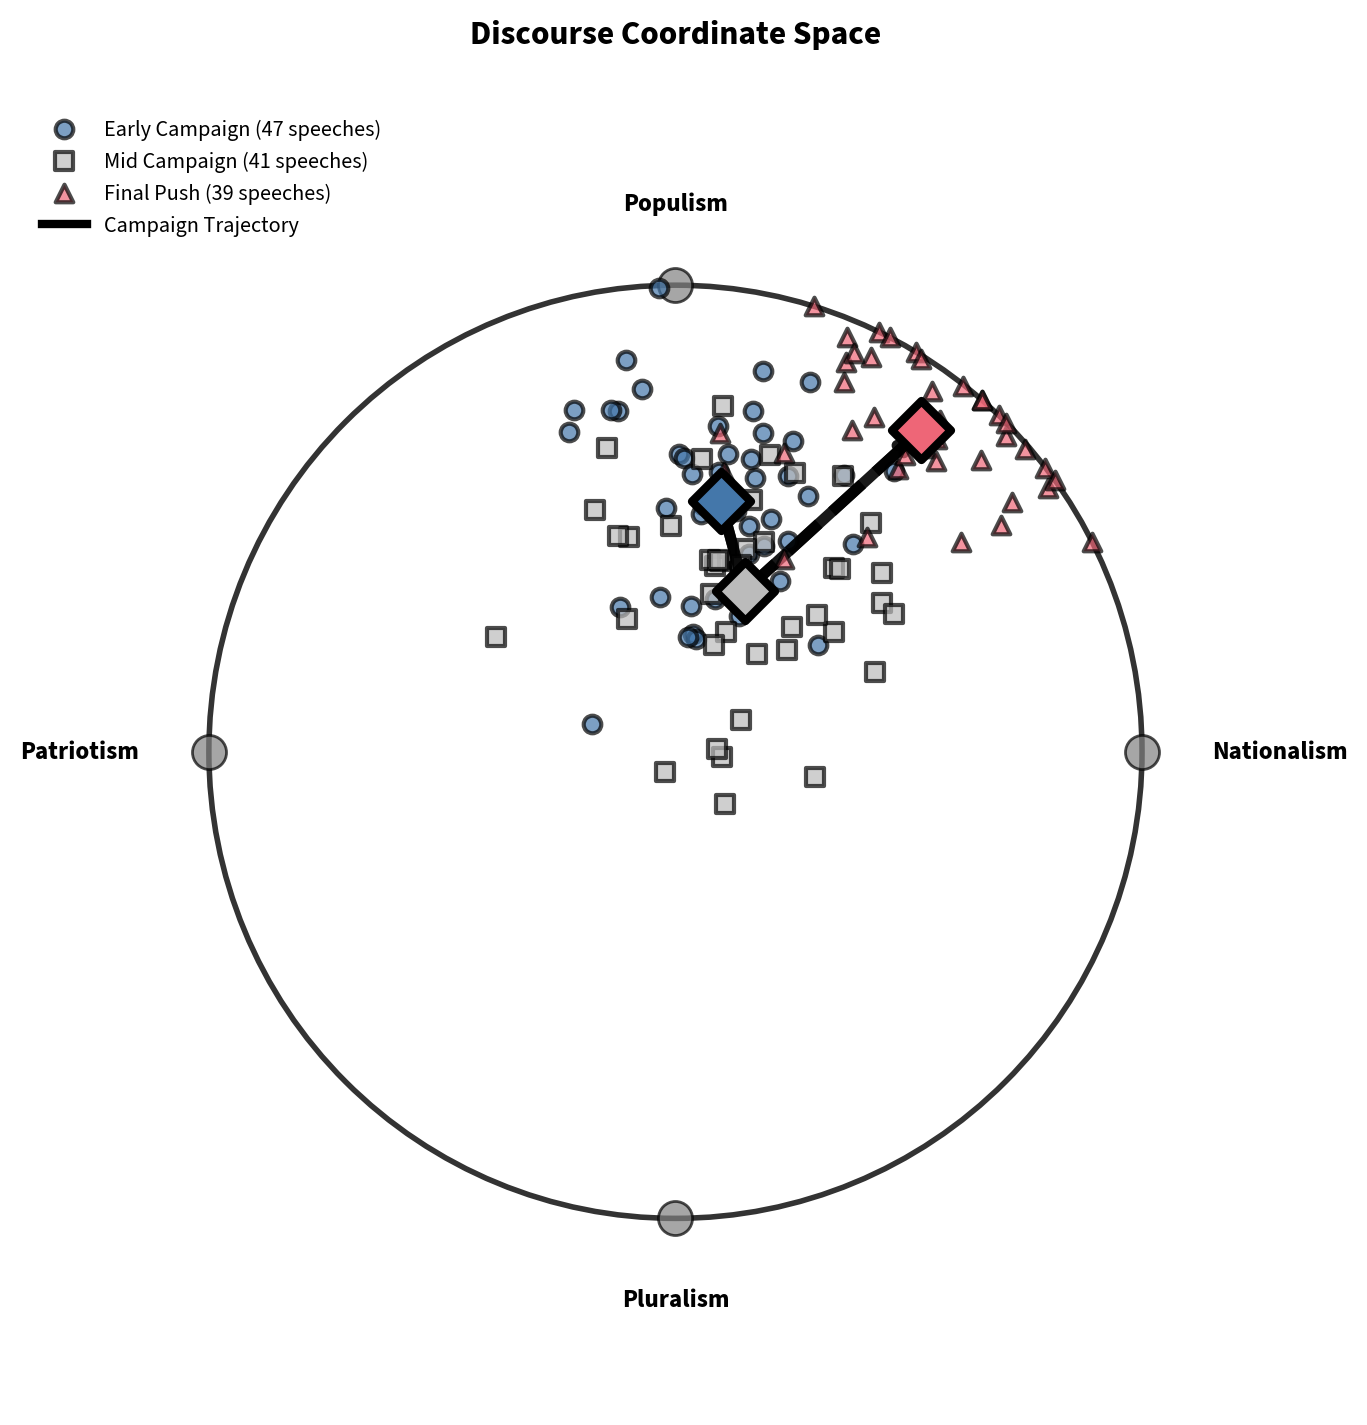

In [7]:
# Chart 1: Main Discourse Coordinate Space
print("🎯 Chart 1: Main Discourse Coordinate Space with Trajectory")
print("   ▸ Shows: Framework anchors, speech positions, phase centroids, trajectory")
print("   ▸ Focus: Core spatial analysis and temporal evolution")
print()

fig1, ax1 = plot_discourse_coordinate_space(framework, signatures, phase_data)
plt.show()


📐 Chart 2: Axis Independence Validation
   ▸ Shows: Correlation between horizontal and vertical axes
   ▸ Focus: Validates orthogonal framework design assumption



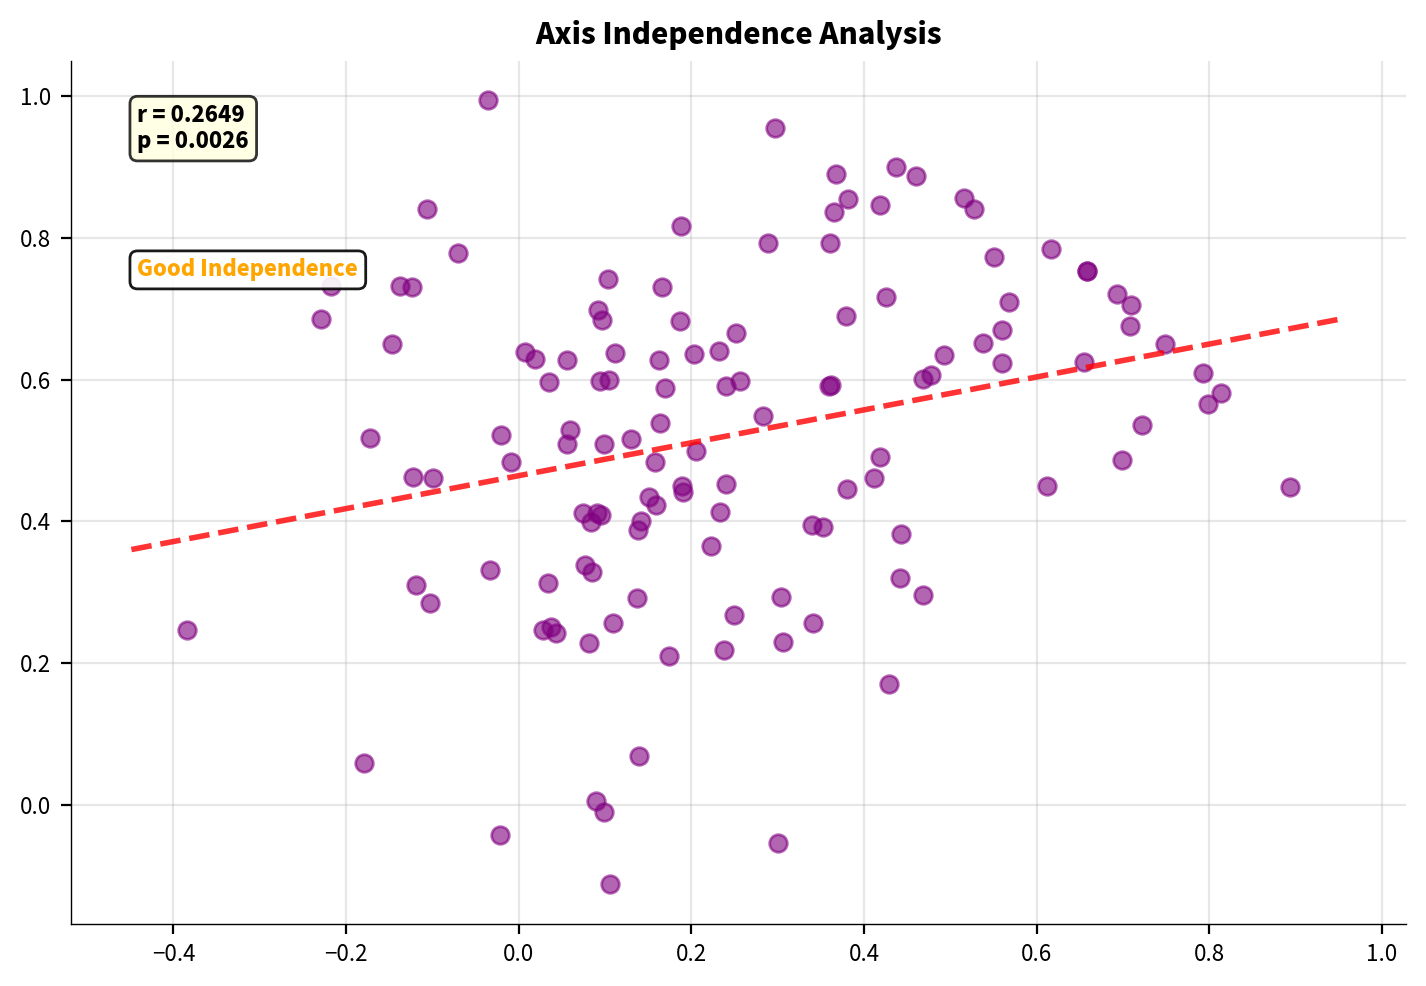

In [8]:
# Chart 2: Axis Independence Analysis
print("📐 Chart 2: Axis Independence Validation")
print("   ▸ Shows: Correlation between horizontal and vertical axes")
print("   ▸ Focus: Validates orthogonal framework design assumption")
print()

fig2, ax2 = plot_axis_independence(signatures)
plt.show()


📈 Chart 3: Ideological Score Evolution Across Campaign Phases
   ▸ Shows: Average scores for each ideology by campaign phase
   ▸ Focus: Tracks strategic messaging changes over time



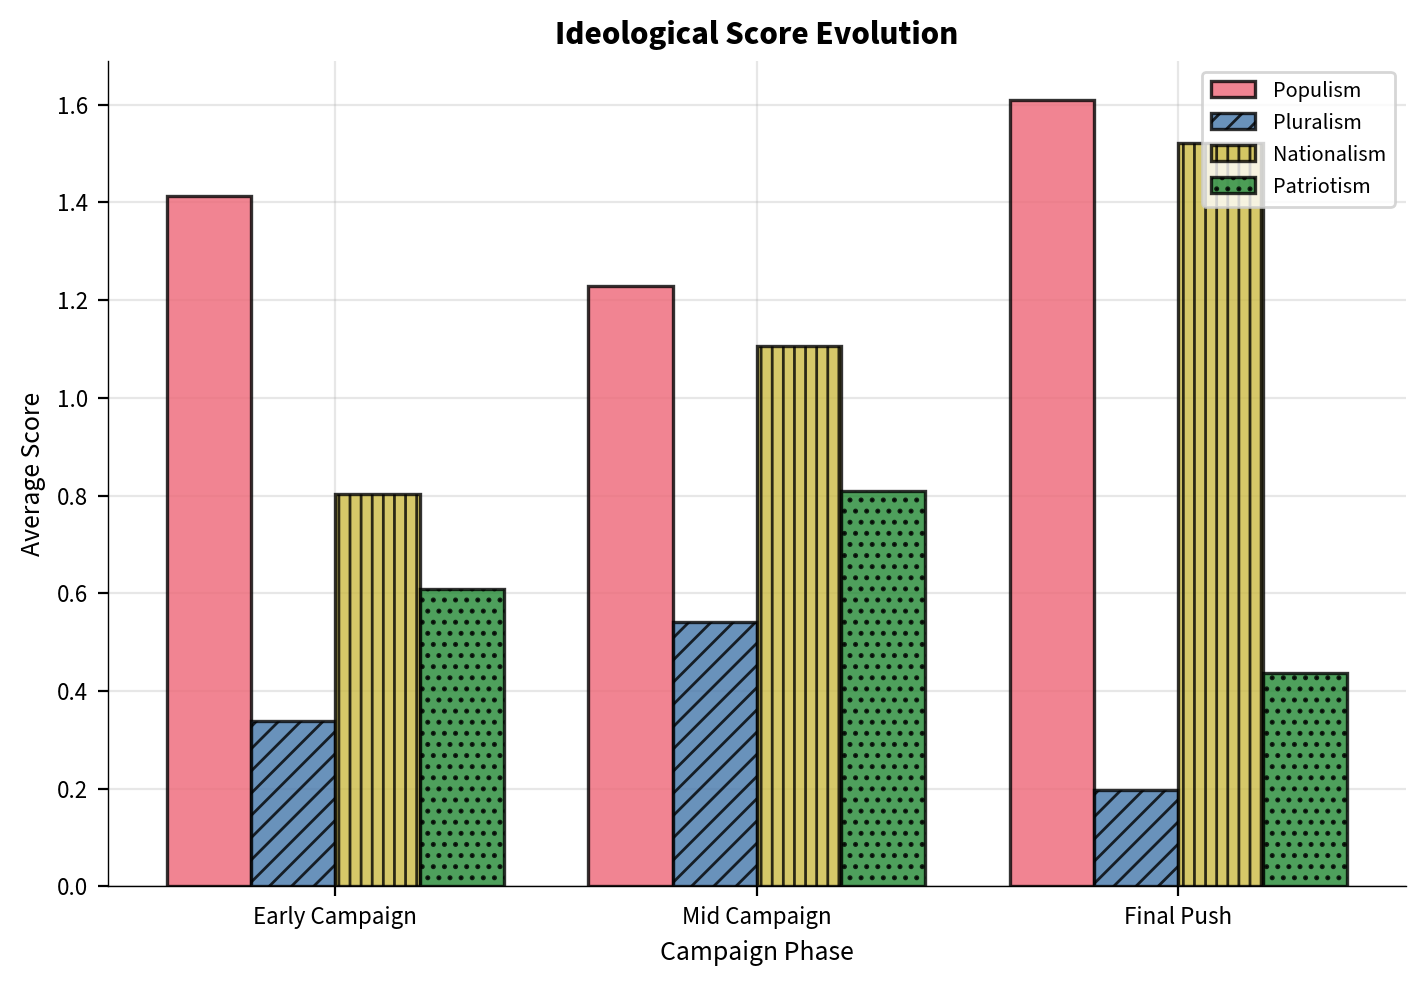

In [9]:
# Chart 3: Ideological Score Evolution
print("📈 Chart 3: Ideological Score Evolution Across Campaign Phases")
print("   ▸ Shows: Average scores for each ideology by campaign phase")
print("   ▸ Focus: Tracks strategic messaging changes over time")
print()

fig3, ax3 = plot_score_evolution(phase_data)
plt.show()


📊 Chart 4: Campaign Message Consistency (Discourse Dispersion)
   ▸ Shows: How spread out speeches are within each phase
   ▸ Focus: Measures messaging discipline and strategic focus



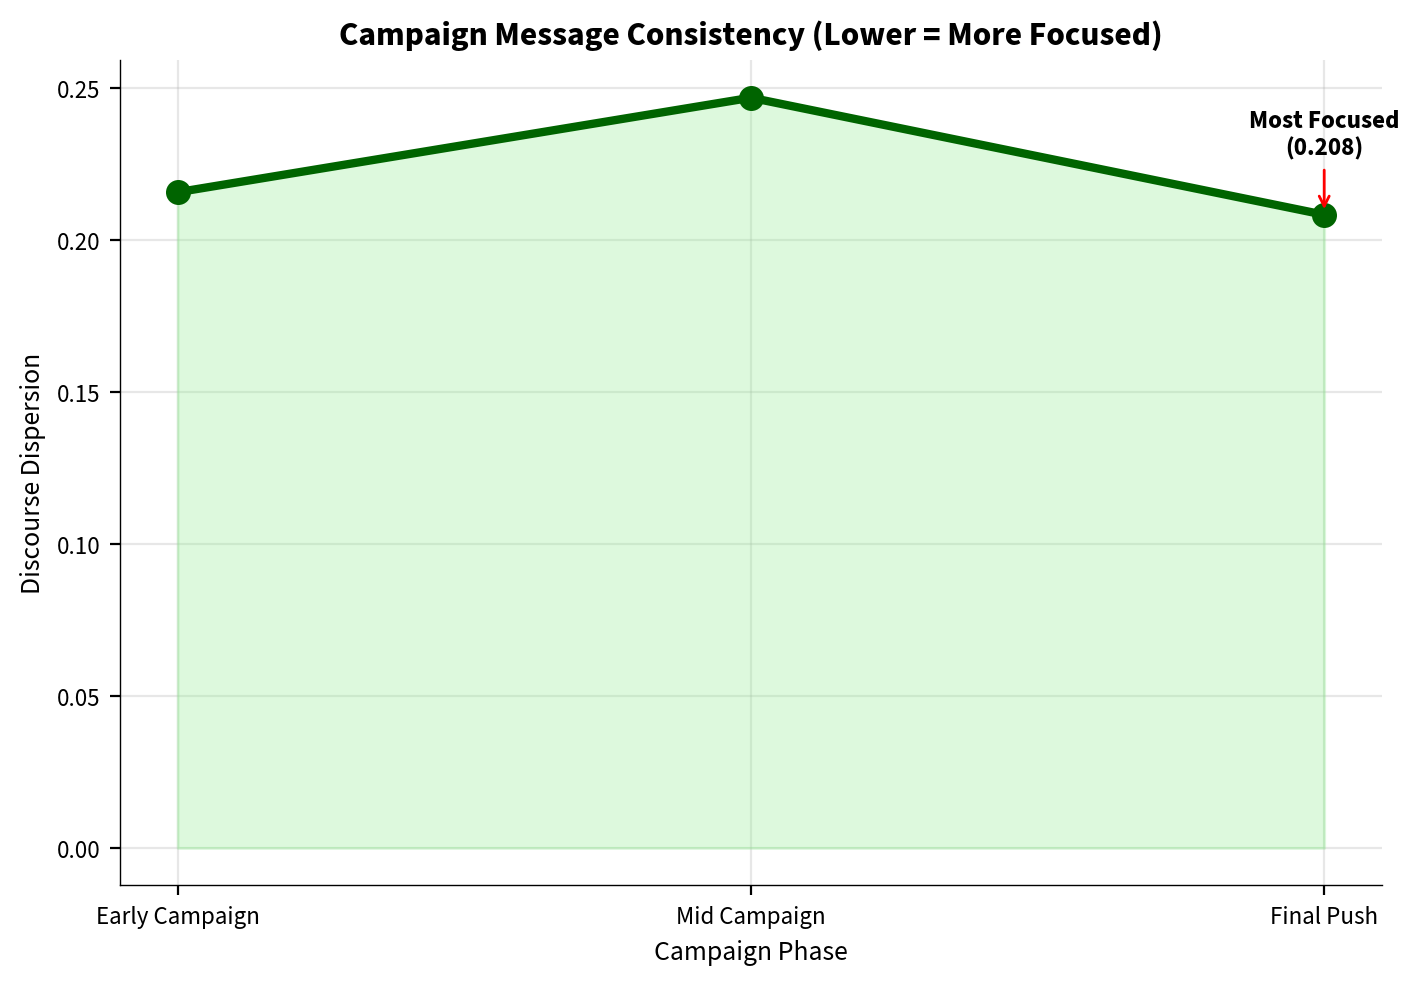

In [10]:
# Chart 4: Campaign Message Consistency
print("📊 Chart 4: Campaign Message Consistency (Discourse Dispersion)")
print("   ▸ Shows: How spread out speeches are within each phase")
print("   ▸ Focus: Measures messaging discipline and strategic focus")
print()

fig4, ax4 = plot_discourse_consistency(phase_data)
plt.show()


In [11]:
# 🎉 SUCCESS: Individual Charts Created for Iterative Development!

print("✅ ENHANCED TEMPLATE COMPLETE!")
print("=" * 60)
print("🎯 You now have 4 individual chart functions:")
print("   1. plot_discourse_coordinate_space() - Main spatial analysis")
print("   2. plot_axis_independence() - Orthogonal validation") 
print("   3. plot_score_evolution() - Temporal ideology tracking")
print("   4. plot_discourse_consistency() - Message focus analysis")
print()
print("🔧 ITERATION WORKFLOW:")
print("   • Pick a chart function to improve")
print("   • Edit colors, sizes, fonts in shared parameters")
print("   • Re-run just that chart cell to see changes")
print("   • Iterate quickly without regenerating everything")
print()
print("🎨 SHARED PARAMETER SYSTEM:")
print("   • ANCHOR_COLORS, PHASE_COLORS, ACCENT_COLORS")
print("   • MARKER_CONFIG, FONT_CONFIG, LAYOUT_CONFIG")
print("   • Changes propagate consistently across all charts")
print()
print("🚀 READY FOR GENERATOR INTEGRATION!")
print("   This modular design is perfect for dynamic notebook generation.")


✅ ENHANCED TEMPLATE COMPLETE!
🎯 You now have 4 individual chart functions:
   1. plot_discourse_coordinate_space() - Main spatial analysis
   2. plot_axis_independence() - Orthogonal validation
   3. plot_score_evolution() - Temporal ideology tracking
   4. plot_discourse_consistency() - Message focus analysis

🔧 ITERATION WORKFLOW:
   • Pick a chart function to improve
   • Edit colors, sizes, fonts in shared parameters
   • Re-run just that chart cell to see changes
   • Iterate quickly without regenerating everything

🎨 SHARED PARAMETER SYSTEM:
   • ANCHOR_COLORS, PHASE_COLORS, ACCENT_COLORS
   • MARKER_CONFIG, FONT_CONFIG, LAYOUT_CONFIG
   • Changes propagate consistently across all charts

🚀 READY FOR GENERATOR INTEGRATION!
   This modular design is perfect for dynamic notebook generation.


In [12]:
# =============================================================================
# DESIGN GUIDE COMPLIANCE DEMONSTRATION
# Shows the "one-click compliance" approach from design_guide.md
# =============================================================================

print("🎨 DESIGN GUIDE COMPLIANCE DEMONSTRATION")
print("=" * 50)
print()
print("✅ Using centralized Discernus design system:")
print("• Typography: Inter-first with academic fallback")
print("• Colors: Paul Tol Bright palette (colorblind-safe)")  
print("• Grayscale: Distinct markers, patterns, line styles")
print("• Sizes: Nature journal compliant figure dimensions")
print()
print("🔄 One-Click Compliance Options:")
print("   from discernus.visualization import setup_style")
print("   setup_style('discernus')          # Distinctive identity")
print("   setup_style('discernus', grayscale_mode=True)  # B&W compatible")
print("   setup_style('nature')             # Journal compliance")
print("   # All existing code works unchanged!")
print()
print("♿ Accessibility Features:")
print("• Distinct marker shapes for each phase (○ □ △)")
print("• Hatching patterns for bar charts (solid, ///, |||)")
print("• Different line styles for trajectory segments")
print("• High contrast black edges and arrows")
print()
print("📁 Export Standards:")
print("• Formats:", EXPORT_FORMATS)
print("• Figure sizes:", FIGURE_SIZE_DOUBLE, FIGURE_SIZE_SQUARE)
print("• Export DPI:", DPI_EXPORT, "(publication standard)")
print()
print("✅ Template demonstrates the 'CSS equivalent' approach!")
print("📚 See: 1_docs/visualization/design_guide.md for complete standards")


🎨 DESIGN GUIDE COMPLIANCE DEMONSTRATION

✅ Using centralized Discernus design system:
• Typography: Inter-first with academic fallback
• Colors: Paul Tol Bright palette (colorblind-safe)
• Grayscale: Distinct markers, patterns, line styles
• Sizes: Nature journal compliant figure dimensions

🔄 One-Click Compliance Options:
   from discernus.visualization import setup_style
   setup_style('discernus')          # Distinctive identity
   setup_style('discernus', grayscale_mode=True)  # B&W compatible
   setup_style('nature')             # Journal compliance
   # All existing code works unchanged!

♿ Accessibility Features:
• Distinct marker shapes for each phase (○ □ △)
• Hatching patterns for bar charts (solid, ///, |||)
• Different line styles for trajectory segments
• High contrast black edges and arrows

📁 Export Standards:
• Formats: ['pdf', 'png', 'eps']
• Figure sizes: (7.2, 5) (7.2, 7.2)
• Export DPI: 600 (publication standard)

✅ Template demonstrates the 'CSS equivalent' approac